In [ ]:
import torch
from transformers import DistilBertTokenizer, GPT2Tokenizer
from src.models import get_model
from src.tokenizer import NewsTokenizer, get_dataset
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def load_results(model_name, num_labels, output_dir):

    results = torch.load(f"../{output_dir}/test_results.pt")
    return results

def plot_confusion_matrix(cm, labels, title):
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def calculate_metrics(true_labels, predictions):
    
    report = classification_report(true_labels, predictions, output_dict=True)
    return report



In [ ]:
distilbert_results = load_results(
    "distilbert-base-uncased", 4, "./distilbert_news_classifier/default"
)

gpt2_results = load_results(
    "gpt2", 4, "./gpt2_news_classifier/default"
)

distilbert_true = distilbert_results['label_ids']
distilbert_pred = distilbert_results['predictions']

gpt2_true = gpt2_results['label_ids']
gpt2_pred = gpt2_results['predictions']

labels = ['World', 'Sports', 'Business', 'Sci/Tech']  

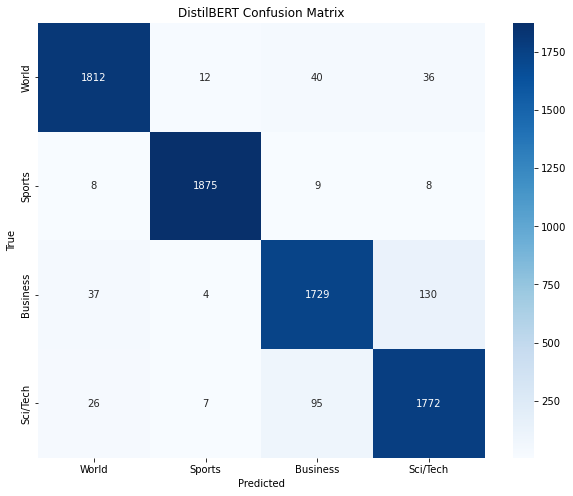

In [4]:
distilbert_cm = confusion_matrix(distilbert_true, distilbert_pred)
plot_confusion_matrix(distilbert_cm, labels, 'DistilBERT Confusion Matrix')

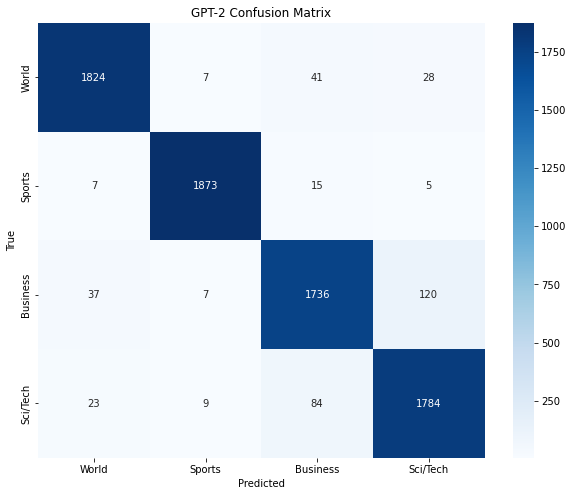

In [5]:
gpt2_cm = confusion_matrix(gpt2_true, gpt2_pred)
plot_confusion_matrix(gpt2_cm, labels, 'GPT-2 Confusion Matrix')

In [6]:
distilbert_metrics = calculate_metrics(distilbert_true, distilbert_pred)
gpt2_metrics = calculate_metrics(gpt2_true, gpt2_pred)

In [7]:
def create_comparison_table(distilbert_metrics, gpt2_metrics):
    metrics = ['precision', 'recall', 'f1-score', 'accuracy']
    
    data = {
        'Metric': metrics,
        'GPT-2': [gpt2_metrics['weighted avg'][m] for m in metrics[:3]] + [gpt2_metrics['accuracy']],
        'DistilBERT': [distilbert_metrics['weighted avg'][m] for m in metrics[:3]] + [distilbert_metrics['accuracy']]
    }
    
    df = pd.DataFrame(data)
    df = df.set_index('Metric')
    df['Difference'] = df['GPT-2'] - df['DistilBERT']
    
    return df

In [8]:
comparison_table = create_comparison_table(distilbert_metrics, gpt2_metrics)
print("\nComparison Table:")
print(comparison_table)


Comparison Table:
              GPT-2  DistilBERT  Difference
Metric                                     
precision  0.949706    0.945970    0.003736
recall     0.949605    0.945789    0.003816
f1-score   0.949623    0.945830    0.003793
accuracy   0.949605    0.945789    0.003816


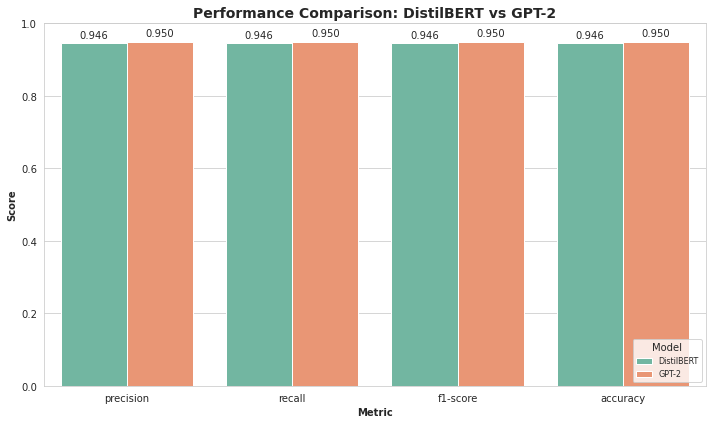

In [10]:
def plot_advanced_comparison(distilbert_metrics, gpt2_metrics):
    metrics = ['precision', 'recall', 'f1-score', 'accuracy']
    
    df = pd.DataFrame({
        'Metric': metrics * 2,
        'Model': ['DistilBERT'] * 4 + ['GPT-2'] * 4,
        'Score': [distilbert_metrics['weighted avg'][m] for m in metrics[:3]] + [distilbert_metrics['accuracy']] +
                 [gpt2_metrics['weighted avg'][m] for m in metrics[:3]] + [gpt2_metrics['accuracy']]
    })
    
    plt.figure(figsize=(10, 6), facecolor='white')
    sns.set_style("whitegrid")
    sns.set_palette("Set2")
    
    ax = sns.barplot(x='Metric', y='Score', hue='Model', data=df)
    
    plt.title('Performance Comparison: DistilBERT vs GPT-2', fontsize=14, fontweight='bold')
    plt.xlabel('Metric', fontsize=10, fontweight='bold')
    plt.ylabel('Score', fontsize=10, fontweight='bold')
    plt.ylim(0, 1)
    
    for i in ax.containers:
        ax.bar_label(i, fmt='%.3f', padding=3)
    
    plt.legend(title='Model', loc='lower right', title_fontsize='10', fontsize='8')
    
    plt.tight_layout()
    plt.savefig('../results/fig.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

plot_advanced_comparison(distilbert_metrics, gpt2_metrics)